# assignment 2 for machine learning a question of going down Mt. Fuji
## Name: Nguyen Anh Hoang Phuc

## Problem 1

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
header = ["x","lat","lng","elevation","distance"]

In [4]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


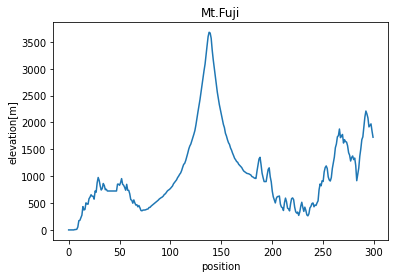

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:,3])

## Probliem 2

In [6]:
point_number = fuji[:,0]
elevation = fuji[:,3]

In [7]:
def calculate_gradient(x):
    return (fuji[x,3] - fuji[x-1,3])/(x-(x-1))

In [8]:
gradient = calculate_gradient(x=136)
print("the slope based on the relationship between the \"current point number\" and the \"current point number (the current point number-1)\" {}".format(gradient))

the slope based on the relationship between the "current point number" and the "current point number (the current point number-1)" 168.35000000000036


## Problem 3

In [9]:
def next_destination(current, alpha=0.2):
    gradient = calculate_gradient(current)
    next = current - alpha * gradient
    next = np.minimum(len(elevation)-1, next)
    next = np.maximum(1, next)
    next = np.round(next).astype(np.int)
    return next

In [10]:
current = 136
next = next_destination(current)
print("calculates the next destination based on the information on the slope of the current location: {}".format(next))

calculates the next destination based on the information on the slope of the current location: 102


## Problem 4

In [11]:
def goes_down_mountain(current, alpha=0.2):
    path = [current]
    # while current_position >= 0:
    while path[-1] not in path[:-1]:
        path.append(next_destination(path[-1], alpha=alpha))
    return path[:-1]

In [12]:
path = goes_down_mountain(current=136)
print(path)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


## Problem 5

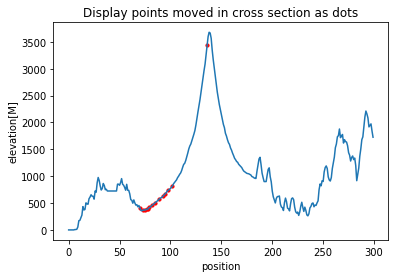

In [13]:
def viz_dot(path):    
    descended_elevations = elevation[path]
    plt.title("Display points moved in cross section as dots")
    plt.ylabel("elevation[M]")
    plt.xlabel("position")
    plt.plot(elevation)
    plt.scatter(path, descended_elevations, 10, color = "red")
    plt.show()
viz_dot(path)

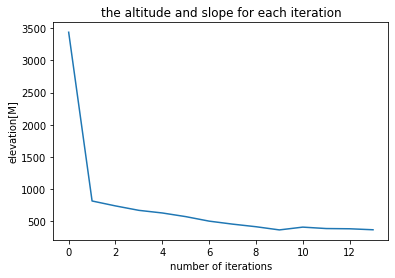

In [14]:
def viz_line(path):
    descended_elevations = elevation[path]
    plt.title("the altitude and slope for each iteration")
    plt.ylabel("elevation[M]")
    plt.xlabel("number of iterations")
    plt.plot(descended_elevations)
    plt.show()
viz_line(path)

## Problem 6

In [18]:
descended_list = []
for i, current in enumerate(range(1, 300)):
    descended_list.append(goes_down_mountain(current))
    print("Current: {}, \nPath to go down moutain: {} \n \n".format(current,descended_list[-1]))
    if current == 138:
        path = descended_list[-1]

Current: 1, 
Path to go down moutain: [1] 
 

Current: 2, 
Path to go down moutain: [2] 
 

Current: 3, 
Path to go down moutain: [3] 
 

Current: 4, 
Path to go down moutain: [4] 
 

Current: 5, 
Path to go down moutain: [5] 
 

Current: 6, 
Path to go down moutain: [6, 5] 
 

Current: 7, 
Path to go down moutain: [7] 
 

Current: 8, 
Path to go down moutain: [8, 7] 
 

Current: 9, 
Path to go down moutain: [9, 1] 
 

Current: 10, 
Path to go down moutain: [10, 1] 
 

Current: 11, 
Path to go down moutain: [11, 10, 1] 
 

Current: 12, 
Path to go down moutain: [12, 2] 
 

Current: 13, 
Path to go down moutain: [13, 4] 
 

Current: 14, 
Path to go down moutain: [14, 1] 
 

Current: 15, 
Path to go down moutain: [15, 27, 31, 51, 41] 
 

Current: 16, 
Path to go down moutain: [16, 14, 1] 
 

Current: 17, 
Path to go down moutain: [17, 1] 
 

Current: 18, 
Path to go down moutain: [18, 22, 13, 4] 
 

Current: 19, 
Path to go down moutain: [19, 21, 15, 27, 31, 51, 41] 
 

Current: 20, 
Pat

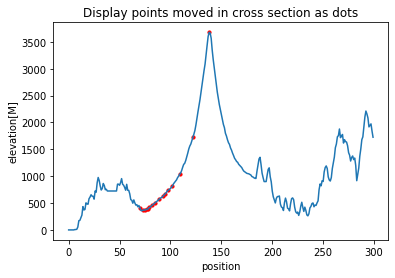

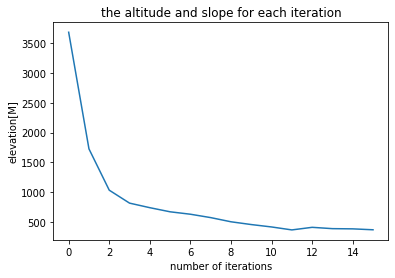

In [19]:
viz_dot(path)
viz_line(path)

## Problem 7

In [23]:
current = 136
alphas = np.array([0.005, 0.01, 0.03, 0.07, 0.1, 0.5, 1])
descended_list_alphas = []
for i, alpha in enumerate(alphas):
    descended_list_alphas.append(goes_down_mountain(current, alpha=alpha))
    print("alpha: {}, \nPath: {} \n \n".format(alpha,descended_list_alphas[-1]))
    if alpha == 0.5:
        path = descended_list_alphas[-1]

alpha: 0.005, 
Path: [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124] 
 

alpha: 0.01, 
Path: [136, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120] 
 

alpha: 0.03, 
Path: [136, 131, 127, 123, 121, 119, 117, 115, 113, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99] 
 

alpha: 0.07, 
Path: [136, 124, 119, 115, 111, 108, 106, 104, 102, 100, 99, 98, 97, 95, 94, 92, 91, 90, 89, 87, 86, 85, 84, 83, 82, 81, 79, 77, 76] 
 

alpha: 0.1, 
Path: [136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80] 
 

alpha: 0.5, 
Path: [136, 52, 15, 46] 
 

alpha: 1.0, 
Path: [136, 1] 
 



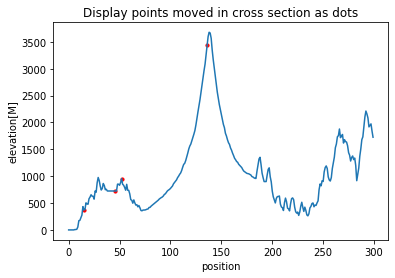

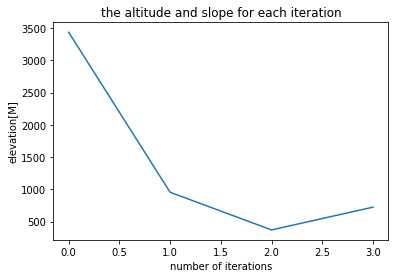

In [24]:
viz_dot(path)
viz_line(path)